# Testing walk forward validation methods

In [1]:
from one_dimensional_time_series_forecasting import time_series_prediction, hit_rate
import pandas as pd

# model evalution metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# data preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

# interactive figures
%matplotlib widget 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

2022-05-07 15:48:19.429534: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-07 15:48:19.429571: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## load some data

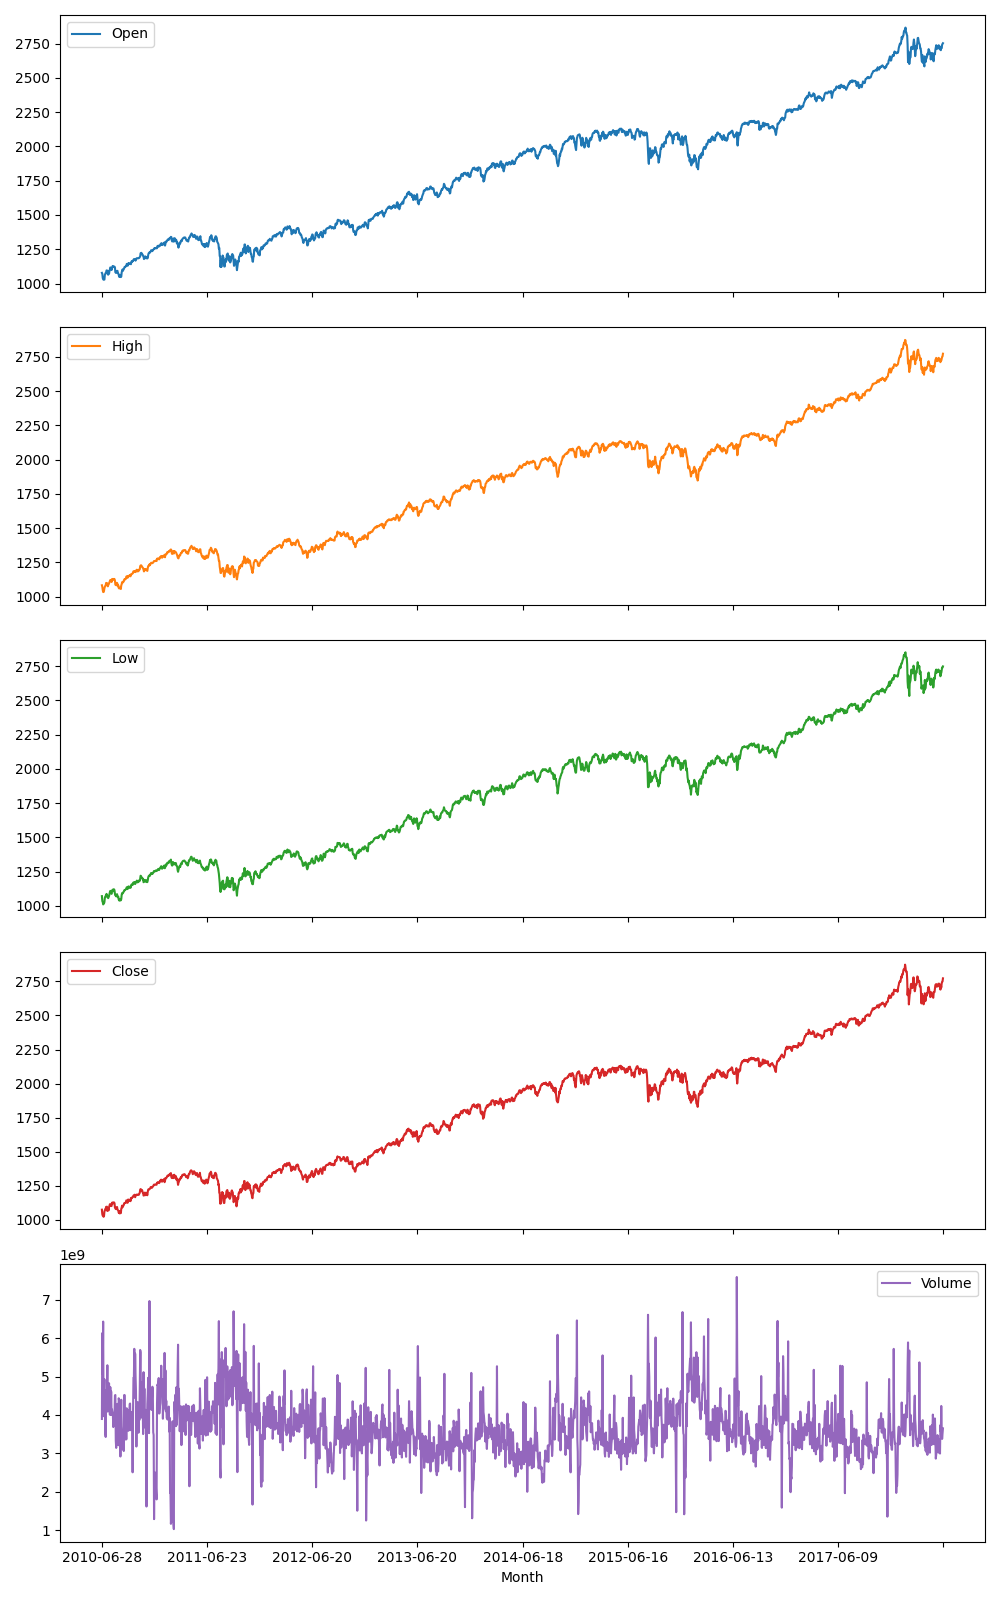

In [2]:
# import some data
df = pd.read_csv('./test_data/GSPC.csv') # sp_500 = GSPC.csv, # airplaine = AirPassengers.csv
df = df.iloc[-2000:,:].reset_index(drop=True) # only look at last 2000 days
df.drop(labels='Adj Close',axis=1,inplace=True)
df.plot(figsize=(10,16),legend=True,xlabel='Month',subplots=True,x='Date')
plt.tight_layout()
# display(df)

## run single of sample forecasting

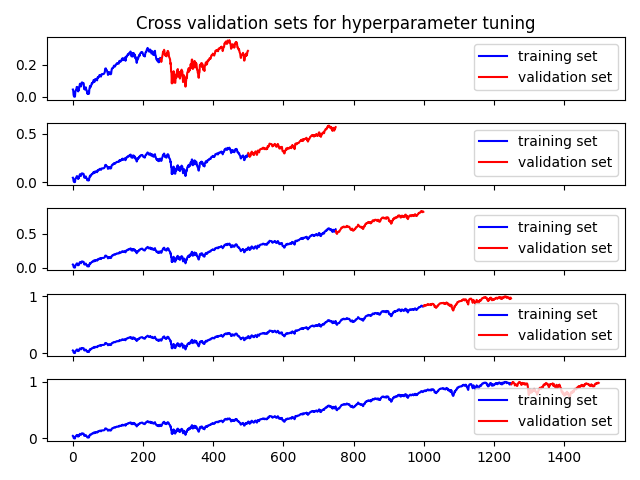

Training multivariate linear regression:

Linear regression coefficients: 
 [ 5.26357975e-02 -5.85276708e-02  8.80795380e-03 -3.29223806e-04
  7.62085013e-02 -4.95962541e-02  1.54658790e-02 -5.65851318e-02
 -1.62826870e-03  1.01241931e+00]
MAPE: 0.00768509287901183
RMSE:  0.015301820141048628
MAE:  0.009819259031783231

Training support vector machine:
best_score:  -0.08308007534671566
best_model:  SVR(C=1, kernel='linear', max_iter=5000, tol=1e-05)
best_params:  {'C': 1, 'kernel': 'linear'}
MAPE: 0.04822385377035041
RMSE:  0.06443413332115887
MAE:  0.060927724514125266

Training MLP neural network: 
best_score:  -0.017763414855816388
best_model:  MLPRegressor(activation='tanh', hidden_layer_sizes=(1000,),
             learning_rate='adaptive', max_iter=5000, n_iter_no_change=200,
             shuffle=False)
best_params:  {'activation': 'tanh', 'hidden_layer_sizes': (1000,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001}
MAPE: 0.0262239060781126
RMSE:  0.03708215969115493
MA

2022-05-07 15:52:29.283823: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-07 15:52:29.283855: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tristan-desktop): /proc/driver/nvidia/version does not exist
2022-05-07 15:52:29.284087: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


12/12 [==============================] - 2s 22ms/step - loss: 0.2968
Epoch 2/2000
12/12 [==============================] - 0s 17ms/step - loss: 0.0423
Epoch 3/2000
12/12 [==============================] - 0s 17ms/step - loss: 0.0221
Epoch 4/2000
12/12 [==============================] - 0s 17ms/step - loss: 0.0042
Epoch 5/2000
12/12 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 6/2000
12/12 [==============================] - 0s 17ms/step - loss: 0.0012
Epoch 7/2000
12/12 [==============================] - 0s 17ms/step - loss: 9.7593e-04
Epoch 8/2000
12/12 [==============================] - 0s 17ms/step - loss: 8.7361e-04
Epoch 9/2000
12/12 [==============================] - 0s 16ms/step - loss: 8.4125e-04
Epoch 10/2000
12/12 [==============================] - 0s 17ms/step - loss: 8.2980e-04
Epoch 11/2000
12/12 [==============================] - 0s 19ms/step - loss: 8.0767e-04
Epoch 12/2000
12/12 [==============================] - 0s 17ms/step - loss: 8.1103e-04
Ep

,date,Value,Linear,SVM,NN,LSTM,Naive
0,2010-06-28,0.045207,None,None,None,None,None
1,2010-06-29,0.039403,None,None,None,None,None
2,2010-06-30,0.011708,None,None,None,None,None
3,2010-07-01,0.003129,None,None,None,None,None
4,2010-07-02,0.000000,None,None,None,None,None
...,...,...,...,...,...,...,...
1995,2018-05-31,1.535608,1.519394,1.471541,1.48355,1.532734,1.518785
1996,2018-06-01,1.533540,1.535435,1.472224,1.487776,1.54461,1.535608
1997,2018-06-04,1.554370,1.533656,1.472862,1.489435,1.541493,1.53354
1998,2018-06-05,1.560528,1.554588,1.47718,1.50324,1.554233,1.55437


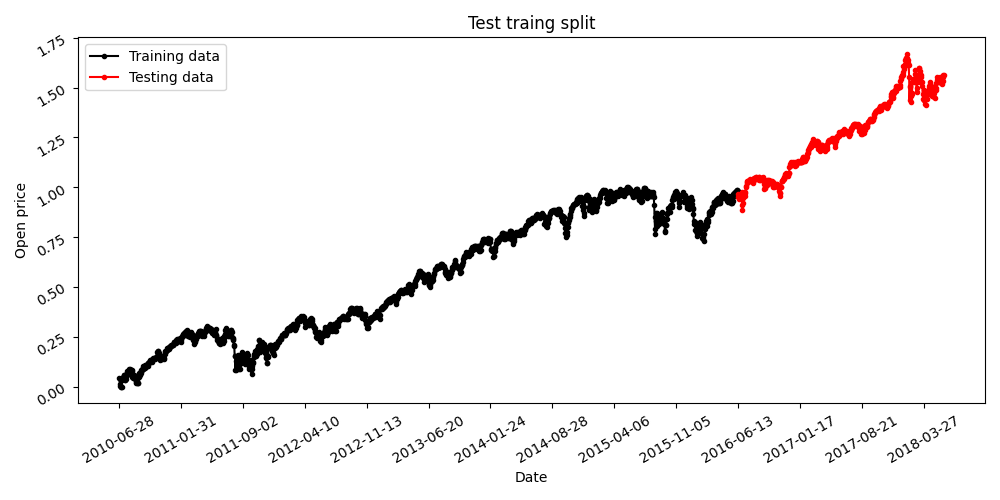

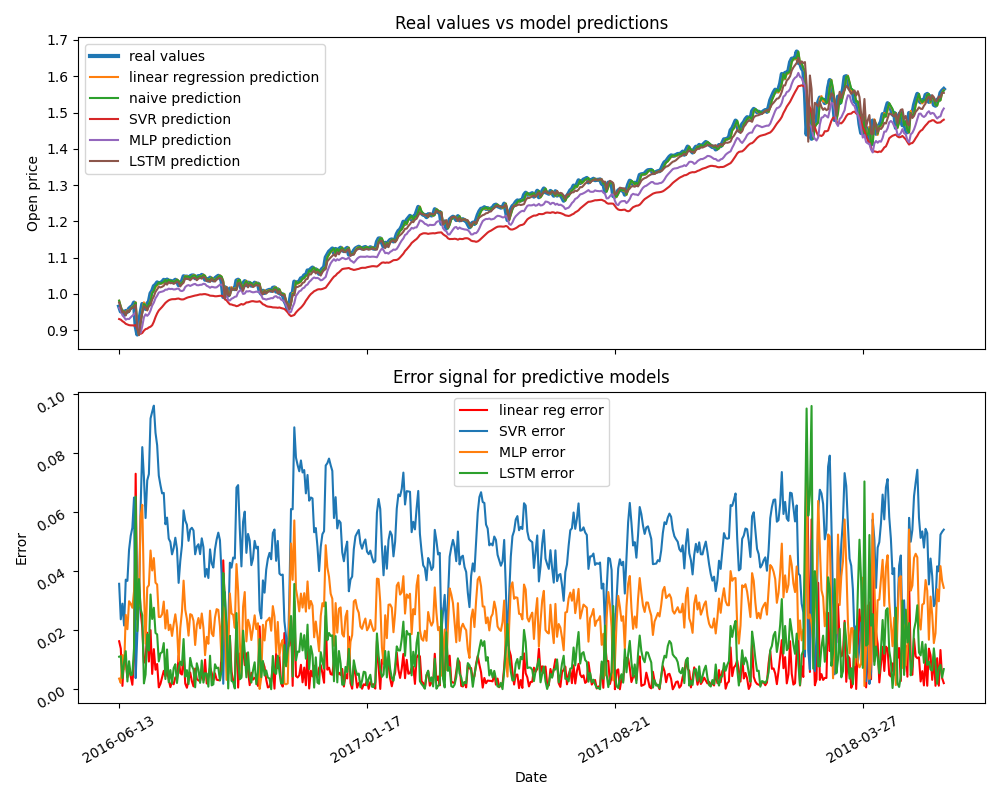

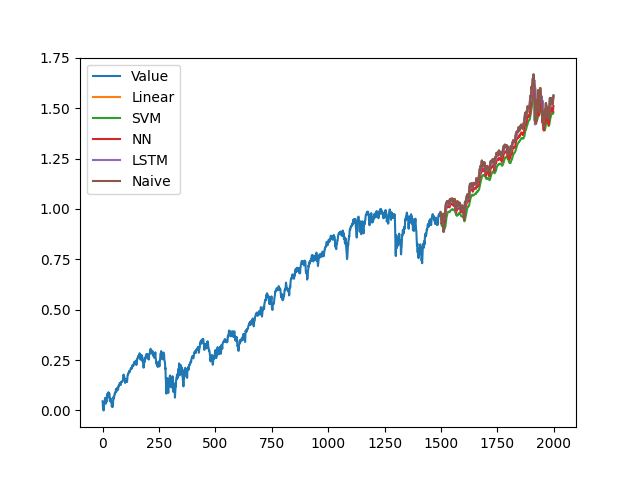

In [3]:
# some forecasting parameters
window_length = 10
split = 500

# scale input data
scaler = MinMaxScaler()
test_data_scaler = scaler.fit(df['Open'].iloc[0:-split].to_numpy().reshape(-1,1))#.flatten()
scaled_training_data = scaler.fit_transform(df['Open'][0:-split].to_numpy().reshape(-1,1))#.flatten()
scaled_test_data = scaler.transform(df['Open'][-split:].to_numpy().reshape(-1,1))#.flatten()
scaled_data = np.append(scaled_training_data,scaled_test_data)

# initialize class object
blah = time_series_prediction(df['Date'],scaled_data,window_length,1)#time_series_prediction(sp_500['Date'][-4000:],sp_500['Volume'][-4000:]/1e9,5,1) # pass: ime series dates, univariate time series, lag window length, a number of steps ahead to predict
blah.sliding_window_1(verbose=0) # time series to supervised ML problem
blah.train_test_split(split=split) # testing and training dataset split
blah.test_train_plot(ylabel='Open price')    # visualize training split

# perform some prediction tasks
blah.linear_regression()
blah.support_vector_machine(model_tunning=True)
blah.neural_net_mlp(model_tunning=True)
blah.lstm(model_tunning=False)
blah.naive_model()

# visualize results
blah.vis_results_time_series(ylabel='Open price',second_plot='error')

# tabulate results
tabulated_results_0 = blah.results()
tabulated_results_0.plot()
display(tabulated_results_0)

## run walk forward validation

Taking 71 walks during walk forward validation
walk 0
Retraining model.
walk 1
walk 2
walk 3
walk 4
walk 5
walk 6
walk 7
walk 8
walk 9
walk 10
Retraining model.
walk 11
walk 12
walk 13
walk 14
walk 15
walk 16
walk 17
walk 18
walk 19
walk 20
Retraining model.
walk 21
walk 22
walk 23
walk 24
walk 25
walk 26
walk 27
walk 28
walk 29
walk 30
Retraining model.
walk 31
walk 32
walk 33
walk 34
walk 35
walk 36
walk 37
walk 38
walk 39
walk 40
Retraining model.
walk 41
walk 42
walk 43
walk 44
walk 45
walk 46
walk 47
walk 48
walk 49
walk 50
Retraining model.
walk 51
walk 52
walk 53
walk 54
walk 55
walk 56
walk 57
walk 58
walk 59
walk 60
Retraining model.
walk 61
walk 62
walk 63
walk 64
walk 65
walk 66
walk 67
walk 68
walk 69
walk 70
Retraining model.
len pred:  1775
len history:  1775
len dates:  1775
Movement prediction accuracy: 50.99 %
Confusion matrix:
[[360 423]
 [447 545]]
MAPE: 0.02106409689447207
RMSE:  0.014728708722315749
MAE:  0.010660277560140295
Directional Accuracy:  0.50985915492957

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

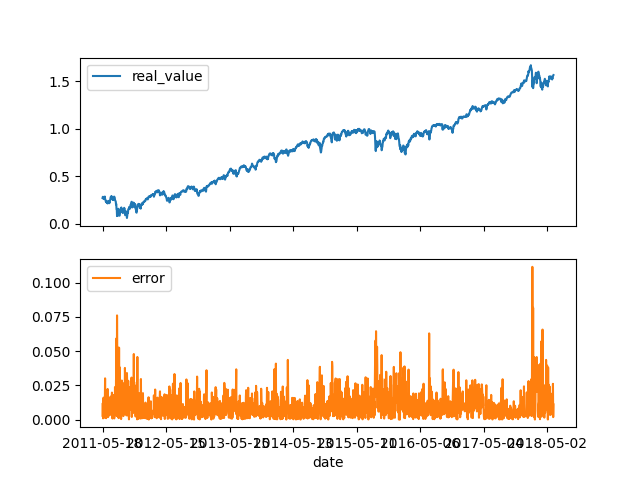

In [22]:
df_walk_forward, df = blah.walk_forward_val('LinearReg',blah.linear_regression_model,train_len=225,test_len=25,train_frequency=10)
df_walk_forward['error'] = abs((df_walk_forward['real_value'] - df_walk_forward['prediction']))# / df_walk_forward['real_value'])
df_walk_forward.plot(x='date',y=['real_value','error'],subplots=True)

Taking 71 walks during walk forward validation
walk 0
Retraining model.
walk 1
walk 2
walk 3
walk 4
walk 5
walk 6
walk 7
walk 8
walk 9
walk 10
Retraining model.
walk 11
walk 12
walk 13
walk 14
walk 15
walk 16
walk 17
walk 18
walk 19
walk 20
Retraining model.
walk 21
walk 22
walk 23
walk 24
walk 25
walk 26
walk 27
walk 28
walk 29
walk 30
Retraining model.
walk 31
walk 32
walk 33
walk 34
walk 35
walk 36
walk 37
walk 38
walk 39
walk 40
Retraining model.
walk 41
walk 42
walk 43
walk 44
walk 45
walk 46
walk 47
walk 48
walk 49
walk 50
Retraining model.
walk 51
walk 52
walk 53
walk 54
walk 55
walk 56
walk 57
walk 58
walk 59
walk 60
Retraining model.
walk 61
walk 62
walk 63
walk 64
walk 65
walk 66
walk 67
walk 68
walk 69
walk 70
Retraining model.
len pred:  1775
len history:  1775
len dates:  1775
Movement prediction accuracy: 52.0 %
Confusion matrix:
[[317 466]
 [386 606]]
MAPE: 0.03216081028205365
RMSE:  0.02607947866270819
MAE:  0.019642672784371484
Directional Accuracy:  0.52


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

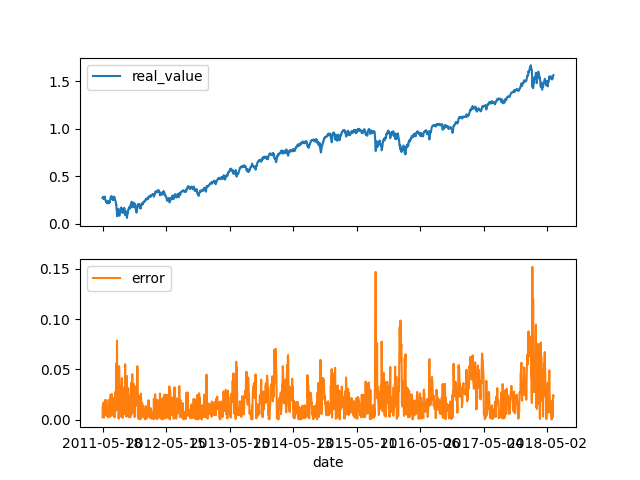

In [23]:
df_walk_forward, df = blah.walk_forward_val('MLP',blah.mlp_model,train_len=225,test_len=25,train_frequency=10)
df_walk_forward['error'] = abs((df_walk_forward['real_value'] - df_walk_forward['prediction']))# / df_walk_forward['real_value'])
df_walk_forward.plot(x='date',y=['real_value','error'],subplots=True)

Taking 71 walks during walk forward validation
walk 0
Retraining model.
7/7 [==============================] - 0s 10ms/step - loss: 4.9870e-04
walk 1
walk 2
walk 3
walk 4
walk 5
walk 6
walk 7
walk 8
walk 9
walk 10
Retraining model.
7/7 [==============================] - 0s 10ms/step - loss: 5.5341e-04
walk 11
walk 12
walk 13
walk 14
walk 15
walk 16
walk 17
walk 18
walk 19
walk 20
Retraining model.
7/7 [==============================] - 0s 9ms/step - loss: 2.2481e-04
walk 21
walk 22
walk 23
walk 24
walk 25
walk 26
walk 27
walk 28
walk 29
walk 30
Retraining model.
7/7 [==============================] - 0s 10ms/step - loss: 0.0015
walk 31
walk 32
walk 33
walk 34
walk 35
walk 36
walk 37
walk 38
walk 39
walk 40
Retraining model.
7/7 [==============================] - 0s 11ms/step - loss: 0.0019
walk 41
walk 42
walk 43
walk 44
walk 45
walk 46
walk 47
walk 48
walk 49
walk 50
Retraining model.
7/7 [==============================] - 0s 11ms/step - loss: 9.6696e-04
walk 51
walk 52
walk 53
walk 5

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

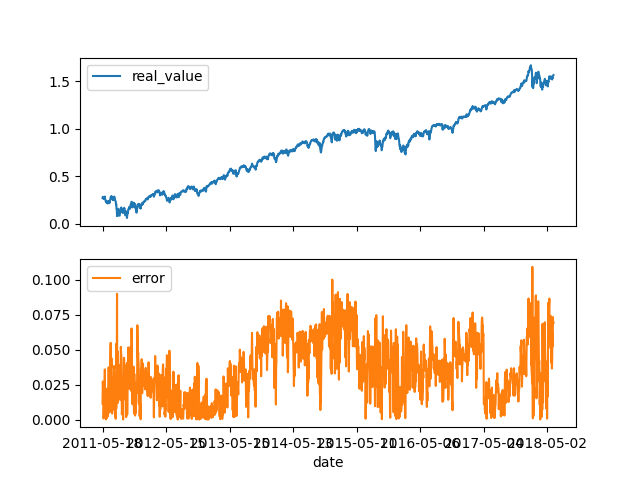

In [24]:
df_walk_forward, df = blah.walk_forward_val('LSTM',blah.lstm_model,train_len=225,test_len=25,train_frequency=10)
df_walk_forward['prediction'] = df_walk_forward['prediction'].astype(float)
df_walk_forward['error'] = abs((df_walk_forward['real_value'] - df_walk_forward['prediction'])) #/ df_walk_forward['real_value'])
df_walk_forward.plot(x='date',y=['real_value','error'],subplots=True)